<a href="https://colab.research.google.com/github/siddhi5386/Emotion-Recognition-from-brain-EEG-signals-/blob/master/emotion%20recognition%20by%20lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install git+https://github.com/forrestbao/pyeeg.git
import numpy as np
import pyeeg as pe
import pickle as pickle
import pandas as pd
import math

from sklearn import svm
from sklearn.preprocessing import normalize
import os
import time

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-mgrjz0r1
  Running command git clone -q https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-mgrjz0r1
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28133 sha256=dc1feafedac4da496c4cd2ac2bc425d7549fd90d62f258dd493aa09bd5af98d7
  Stored in directory: /tmp/pip-ephem-wheel-cache-qbdcdowg/wheels/b0/23/e4/703c908bda656959957029fa145879aa79307b2545a2ef0271
Successfully built pyeeg


In [ ]:

import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
#from keras.utils import to_categorical 
from keras.layers import Flatten
from keras.layers import Dense
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D
from keras.optimizers import SGD
#import cv2, numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.getcwd()
os.chdir('/content/drive/MyDrive')

In [ ]:
channel = [1,2,3,4,6,11,13,17,19,20,21,25,29,31] 
band = [4,8,12,16,25,45] 
window_size = 256
step_size = 16 
sample_rate = 128 
subjectList = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20']

In [ ]:
with open("/content/drive/MyDrive/BTP/data_preprocessed_python/s01.dat", 'rb') as file:
    subject = pickle.load(file, encoding='latin1')
    data=subject["data"][0]
    labels=subject["labels"][0]
    print(data.shape)
    


(40, 8064)


In [ ]:
def FFT_Processing (sub, channel, band, window_size, step_size, sample_rate):
    '''
    arguments:  string subject
                list channel indice
                list band
                int window size for FFT
                int step size for FFT
                int sample rate for FFT
    return:     void
    '''
    meta = []
    with open("/content/drive/MyDrive/BTP/data_preprocessed_python/s" + sub + '.dat', 'rb') as file:
        print("sub")
        subject = pickle.load(file, encoding='latin1') 
        for i in range (0,40):
            # loop over 0-39 trails
            data = subject["data"][i]
            labels = subject["labels"][i]
            start = 0;

            while start + window_size < data.shape[1]:
                meta_array = []
                meta_data = [] 
                for j in channel:
                    X = data[j][start : start + window_size] 
                    Y = pe.bin_power(X, band, sample_rate) 
                    meta_data = meta_data + list(Y[0])

                meta_array.append(np.array(meta_data))
                meta_array.append(labels)

                meta.append(np.array(meta_array))    
                start = start + step_size
                
        meta = np.array(meta)
        np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/s' + sub, meta, allow_pickle=True, fix_imports=True)

In [ ]:
with open("/content/drive/MyDrive/BTP/data_preprocessed_python/s01.dat", 'rb') as file:
    subject = pickle.load(file, encoding='latin1')

In [ ]:
total_samples = []
total_labels = []
for subject in subjectList:
  FFT_Processing (subject, channel, band, window_size, step_size, sample_rate)

In [ ]:
total_samples=np.array(total_samples)
total_labels=np.array(total_labels)

In [ ]:
print(total_samples.shape)
print(total_labels.shape)


(32000, 8064)
(32000, 4)


In [ ]:
total_samples=[]
total_labels=[]
for subject in subjectList:
   with open('/content/drive/MyDrive/BTP/data_preprocessed_python/s' + subject + '.npy', 'rb') as file:
      sub = np.load(file,allow_pickle=True)
      for i in range(sub.shape[0]):
        total_samples.append(sub[i][0])
        total_labels.append(sub[i][1])
total_samples=np.array(total_samples)
total_labels=np.array(total_labels)
print(total_samples.shape)
print(total_labels.shape)       
     

(390400, 70)
(390400, 4)


In [ ]:
##finding no of Principal components
from sklearn.preprocessing import StandardScaler

total_samples_std=StandardScaler().fit_transform(total_samples)
cov_mat=np.cov(total_samples_std.T)
print(cov_mat.shape)

u, s, vh = np.linalg.svd(cov_mat, full_matrices=True)
num_components=0
total_sum=np.sum(s)
val_sum=0
length=s.shape[0]
print(length)
res=0
for i in range(length):
  val_sum+=s[i]
  res=(val_sum/total_sum)*100
  print(val_sum,res)
  if res>=95:
    num_components=i
    break
print(num_components,res)

In [ ]:
val_sum=0
res=0
for i in range(10):
  val_sum+=s[i]
  print(val_sum)
  # res=(val_sum/total_sum)*100
  # if res>=43:
  #   num_components=i
  #   break
# print(num_components,res)

5393.869915374216
6254.774000048762
6721.0514240034245
6986.491784366561
7162.051823295925
7295.994352773174
7393.385421144539
7465.151686531265
7520.705182657942
7565.254894231411


In [ ]:
def fit_transform(X,num_components,cov_mat):
  eig_vals,eig_vecs = np.linalg.eigh(cov_mat)
  eig_pairs = [(eig_vals[i], eig_vecs[:,i]) for i in range(len(eig_vals))]
  eig_pairs.sort(key=lambda x: x[0], reverse=True)
  nw_eig_vecs=[]
  for i in range(num_components):
      nw_eig_vecs.append(eig_pairs[i][1])
  nw_eig_vecs=np.array(nw_eig_vecs)
  print(nw_eig_vecs.shape)
  required_components = np.dot(X,nw_eig_vecs.T)
  return required_components

In [ ]:
new_total_samples=fit_transform(total_samples_std,num_components,cov_mat)
print(new_total_samples.shape)

(13, 70)
(390400, 13)


In [ ]:
# from sklearn.decomposition import PCA as _PCA
# _pca = _PCA(num_components)
# newX = _pca.fit_transform(total_samples_std)
# print(newX[0])

In [ ]:

data_training = []
label_training = []
data_testing = []
label_testing = []

for subjects in subjectList:

    with open('/content/drive/MyDrive/BTP/data_preprocessed_python/s' + subjects + '.npy', 'rb') as file:
      sub = np.load(file,allow_pickle=True)
      for i in range (0,sub.shape[0]):
        if i % 4 == 0:
          data_testing.append(sub[i][0])
          label_testing.append(sub[i][1])
        else:
          data_training.append(sub[i][0])
          label_training.append(sub[i][1])

np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/data_training', np.array(data_training), allow_pickle=True, fix_imports=True)
np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/label_training', np.array(label_training), allow_pickle=True, fix_imports=True)
print("training dataset:", np.array(data_training).shape, np.array(label_training).shape)

np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/data_testing', np.array(data_testing), allow_pickle=True, fix_imports=True)
np.save('/content/drive/MyDrive/BTP/data_preprocessed_python/label_testing', np.array(label_testing), allow_pickle=True, fix_imports=True)
print("testing dataset:", np.array(data_testing).shape, np.array(label_testing).shape)

training dataset: (292800, 70) (292800, 4)
testing dataset: (97600, 70) (97600, 4)


In [ ]:

with open('/content/drive/MyDrive/BTP/data_preprocessed_python/data_training.npy', 'rb') as fileTrain:
    X  = np.load(fileTrain)
    
with open('/content/drive/MyDrive/BTP/data_preprocessed_python/label_training.npy', 'rb') as fileTrainL:
    Y  = np.load(fileTrainL)
    
X = normalize(X)
Z = np.ravel(Y[:, [1]])

Arousal_Train = np.ravel(Y[:, [0]])
Valence_Train = np.ravel(Y[:, [1]])
Domain_Train = np.ravel(Y[:, [2]])
Like_Train = np.ravel(Y[:, [3]])

In [ ]:
X.shape

(292800, 70)

In [ ]:
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(Z)
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_train = np.array(X[:])

In [ ]:

with open('/content/drive/MyDrive/BTP/data_preprocessed_python/data_testing.npy', 'rb') as fileTrain:
    M  = np.load(fileTrain)
    
with open('/content/drive/MyDrive/BTP/data_preprocessed_python/label_testing.npy', 'rb') as fileTrainL:
    N  = np.load(fileTrainL)

M = normalize(M)
L = np.ravel(N[:, [1]])

Arousal_Test = np.ravel(N[:, [0]])
Valence_Test = np.ravel(N[:, [1]])
Domain_Test = np.ravel(N[:, [2]])
Like_Test = np.ravel(N[:, [3]])

In [ ]:
x_test = np.array(M[:])

In [ ]:
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras.utils import to_categorical
y_test = to_categorical(L)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [ ]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
x_train.shape

(292800, 70, 1)

In [ ]:

batch_size = 256
num_classes = 10
epochs = 200
input_shape=(x_train.shape[1], 1)

In [ ]:

print(input_shape)

(70, 1)


In [ ]:
from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

# # compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m])

# # fit the model
# history = model.fit(Xtrain, ytrain, validation_split=0.3, epochs=10, verbose=0)

# evaluate the model


In [ ]:
  import time
  start_time = time.time()
  from keras.regularizers import l2
  from keras.layers import Bidirectional
  from keras.layers import LSTM

  model = Sequential()
 
  model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=input_shape))
  model.add(Dropout(0.6))

  model.add(LSTM(units = 256, return_sequences = True))  
  model.add(Dropout(0.6))

  model.add(LSTM(units = 64, return_sequences = True))  
  model.add(Dropout(0.6))

  model.add(LSTM(units = 64, return_sequences = True))  
  model.add(Dropout(0.4))

  model.add(LSTM(units = 32))
  model.add(Dropout(0.4))

  model.add(Dense(units = 16))
  model.add(Activation('relu'))

  model.add(Dense(units = num_classes))
  model.add(Activation('softmax'))
  model.compile(optimizer ="adam", loss =keras.losses.categorical_crossentropy,metrics=['acc',f1_m,precision_m, recall_m])
  model.summary()
  m=model.fit(x_train, y_train,epochs=200,batch_size=256,verbose=1,validation_data=(x_test, y_test))
  print("--- %s seconds ---" % (time.time() - start_time))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 70, 256)           133120    
_________________________________________________________________
dropout (Dropout)            (None, 70, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 70, 256)           525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 70, 256)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 70, 64)            82176     
_________________________________________________________________
dropout_2 (Dropout)          (None, 70, 64)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 70, 64)            3

In [ ]:
score = model.evaluate(x_test, y_test, verbose=1)
print(model.metrics_names)
print(score)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
loss, accuracy, f1_score, precision, recall = model.evaluate(x_test, y_test, verbose=0)


In [ ]:
print(loss, accuracy, f1_score, precision, recall)

In [ ]:
import matplotlib.pyplot as plt
print(m.history.keys())
# summarize history for accuracy
plt.plot(m.history['accuracy'])
plt.plot(m.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# summarize history for loss
plt.plot(m.history['loss'])
plt.plot(m.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(m.history['val_accuracy'])
plt.plot(m.history['val_loss'])
plt.title('test model')
plt.ylabel('test accuracy')
plt.xlabel('test loss')
plt.show()

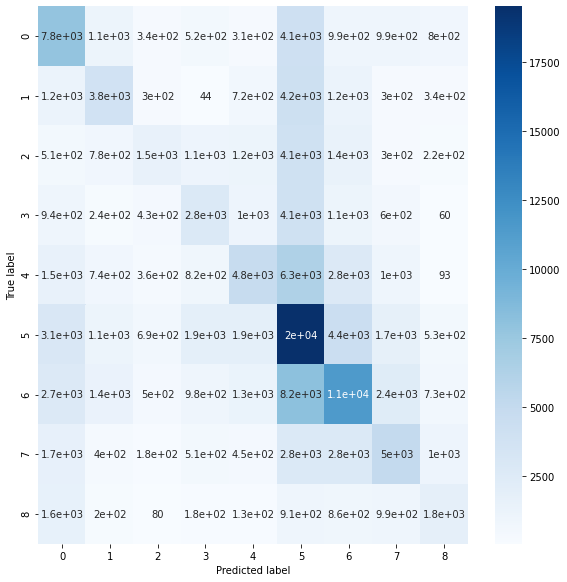

In [ ]:
y_pred=model.predict_classes(x_test)
from sklearn.metrics import confusion_matrix
import numpy as np
y_test=np.argmax(y_test, axis=1)
cmatrix=confusion_matrix(y_test, y_pred)
import seaborn as sns
figure = plt.figure(figsize=(8, 8))
sns.heatmap(cmatrix, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()